In [1]:
import numpy as np
import matplotlib.pyplot as p

In [10]:
N = 20000
x = np.linspace(0,20*np.pi,N)
signal1 = np.sin(x)
signal2 = 0.5*np.sin(10*x)
noise = 2*(np.random.random_sample(N)-0.5)
signal = signal1 + signal2
signal += noise

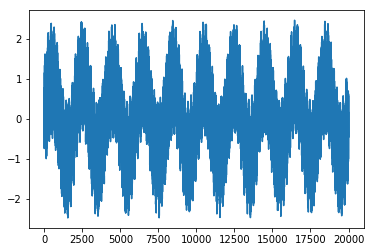

In [11]:
p.plot(signal)

In [12]:
def dft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = np.exp(-1j*2*np.pi/N*n_mat*k_mat)
    vt = np.matmul(exp_mat,v)
    return vt
vt = dft(signal)

def idft(v):
    N = len(v)
    n_mat, k_mat = np.meshgrid(np.arange(N),np.arange(N))
    exp_mat = 1/N*np.exp(1j*2*np.pi/N*n_mat*k_mat)
    vt = np.matmul(exp_mat,v)
    return vt
vtt = idft(vt)

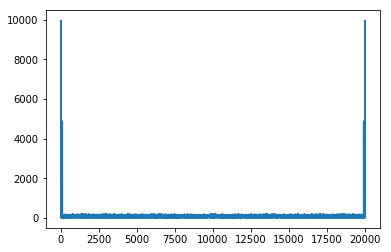

In [13]:
p.plot(np.abs(vt))

In [ ]:
p.plot(np.real(vtt-signal))